In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
df_original = pd.read_csv('./dataset.csv', sep=',', header=0)
df = pd.DataFrame(data=df_original)
sns.set(style="ticks", color_codes=True)
df.info()

# df_original.head()
# print(df.shape)
# df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 42 columns):
Unnamed: 0                      39644 non-null int64
n_tokens_title                  39644 non-null float64
n_tokens_content                39644 non-null float64
n_unique_tokens                 39644 non-null float64
n_non_stop_unique_tokens        39644 non-null float64
num_hrefs                       39644 non-null float64
num_self_hrefs                  39644 non-null float64
num_imgs                        39644 non-null float64
average_token_length            39644 non-null float64
num_keywords                    39644 non-null float64
kw_max_min                      39644 non-null float64
kw_avg_min                      39644 non-null float64
kw_min_max                      39644 non-null float64
kw_avg_max                      39644 non-null float64
kw_min_avg                      39644 non-null float64
kw_max_avg                      39644 non-null float64
kw_avg_avg   

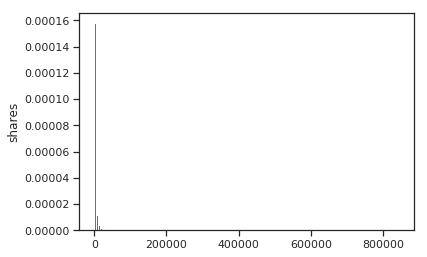

In [4]:
plt.hist(df['shares'], density=True, bins=150)
plt.ylabel('shares');

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39053 entries, 0 to 39643
Data columns (total 42 columns):
Unnamed: 0                      39053 non-null int64
n_tokens_title                  39053 non-null float64
n_tokens_content                39053 non-null float64
n_unique_tokens                 39053 non-null float64
n_non_stop_unique_tokens        39053 non-null float64
num_hrefs                       39053 non-null float64
num_self_hrefs                  39053 non-null float64
num_imgs                        39053 non-null float64
average_token_length            39053 non-null float64
num_keywords                    39053 non-null float64
kw_max_min                      39053 non-null float64
kw_avg_min                      39053 non-null float64
kw_min_max                      39053 non-null float64
kw_avg_max                      39053 non-null float64
kw_min_avg                      39053 non-null float64
kw_max_avg                      39053 non-null float64
kw_avg_avg   

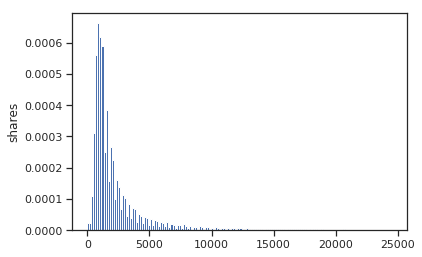

In [5]:
def remove_outliers(df, variable):
    mean = np.median(df[variable])
    std = np.std(df[variable])
    ma = (mean + 2 * std)
    mi = (mean - 2 * std)
    df_new = df[df[variable] < ma]
    df_new = df_new[df_new[variable] > mi]

    return df_new

df_clean = remove_outliers(df, 'shares')

x = df_clean['shares']
plt.hist(x, density=True, bins=150)
plt.ylabel('shares');
df_clean.info()

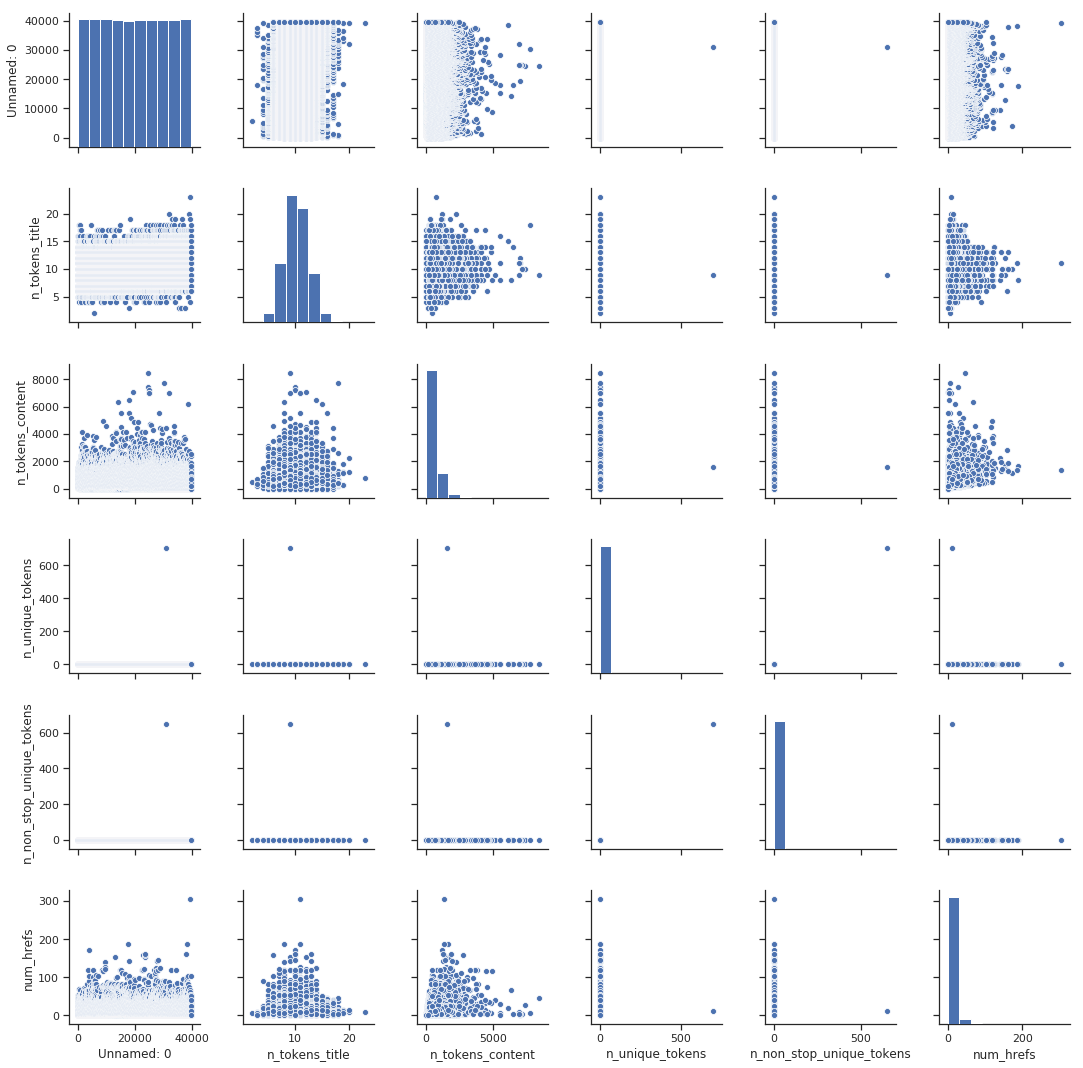

In [6]:
sns.pairplot(df_clean[df_clean.columns[:6]], palette="husl");

In [7]:
# Identificação de um outlier
df_clean[df_clean.n_unique_tokens > 1]

,Unnamed: 0,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
31037,31037,9.0,1570.0,701.0,650.0,11.0,10.0,51.0,4.696178,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5900


In [8]:
df_clean = df_clean[df_clean['n_unique_tokens'] < 1].copy()
df_clean = df_clean[df_clean['num_hrefs'] < 230].copy()
df_clean = df_clean[df_clean['num_self_hrefs'] < 100].copy()

df_clean.to_csv('clean_dataset.csv')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39050 entries, 0 to 39643
Data columns (total 42 columns):
Unnamed: 0                      39050 non-null int64
n_tokens_title                  39050 non-null float64
n_tokens_content                39050 non-null float64
n_unique_tokens                 39050 non-null float64
n_non_stop_unique_tokens        39050 non-null float64
num_hrefs                       39050 non-null float64
num_self_hrefs                  39050 non-null float64
num_imgs                        39050 non-null float64
average_token_length            39050 non-null float64
num_keywords                    39050 non-null float64
kw_max_min                      39050 non-null float64
kw_avg_min                      39050 non-null float64
kw_min_max                      39050 non-null float64
kw_avg_max                      39050 non-null float64
kw_min_avg                      39050 non-null float64
kw_max_avg                      39050 non-null float64
kw_avg_avg   

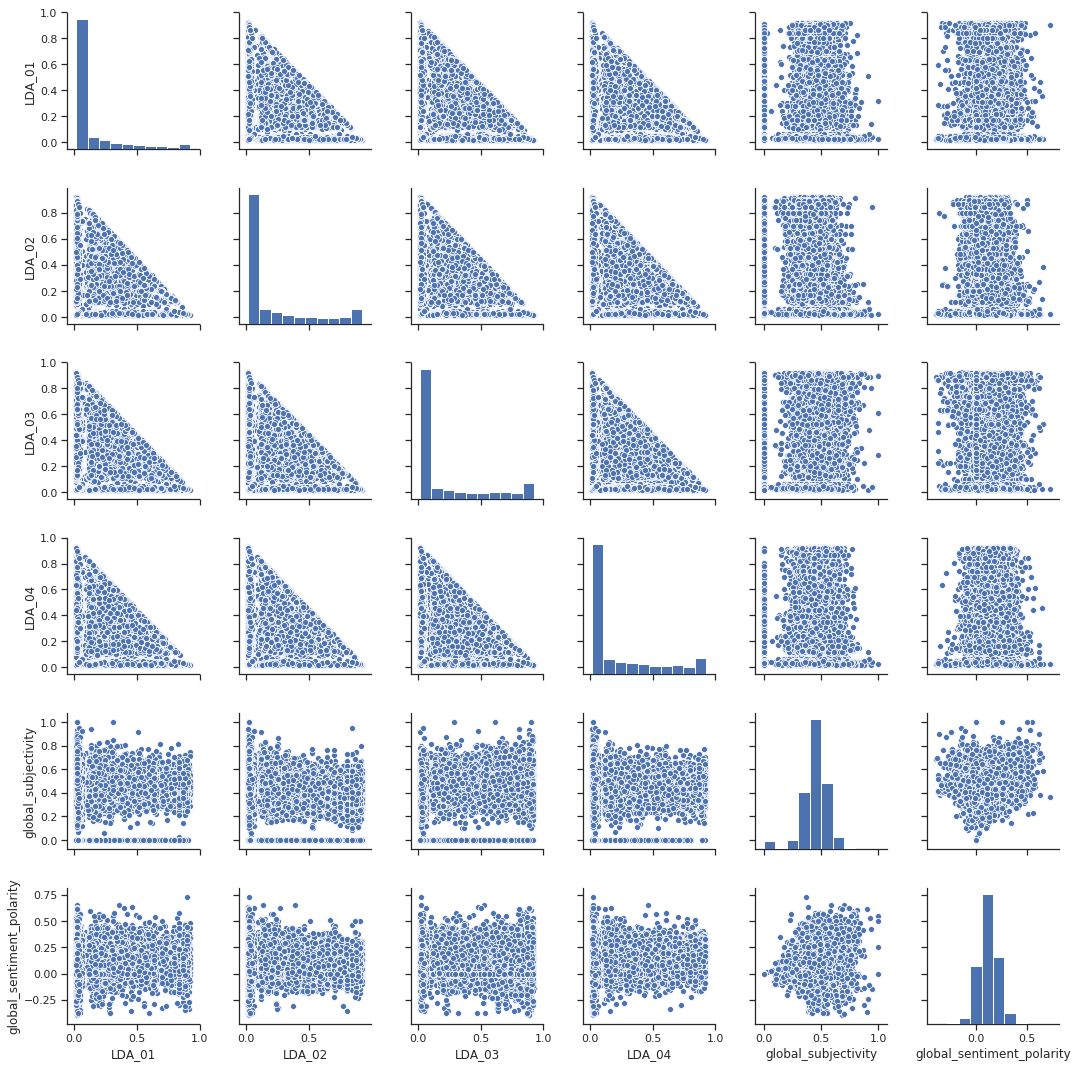

In [11]:
sns.pairplot(df_clean[df_clean.columns[21:27]], palette="husl");